# Numeros Primos

In [58]:
import numpy as np

import matplotlib.pyplot as plt

import time

## ¿Es primo?

In [59]:
def is_prime1(n: int) -> bool:
    if n == 1:
        return False

    if n % 2 == 0 and n >2:
        return False
    
    n_s = np.sqrt(n)
    
    seq = [n % (2*x + 1) for x in range(1, int(n_s / 2) + 1)]

    for i in range (len(seq)):
        if seq[i] == 0:
            return False

    return True

In [60]:
def is_prime2(n: int) -> bool:
    if n == 1:
        return False
    
    if n % 2 == 0 and n >2:
        return False
    
    n_s = np.sqrt(n)
    
    seq = [n % x for x in range(2, int(n_s) + 1)]
    #print(len(seq))

    seq = np.array(seq)

    seq = np.where(seq == 0, 1, 0)

    if sum(seq) >= 1:
        return False
    else:
        return True

In [61]:
def is_prime3(n: int) -> bool:
    if n == 1:
        return False
    
    if n % 2 == 0 and n >2:
        return False
    
    n_s = np.sqrt(n)
    
    seq = [n % (2*x + 1) for x in range(1, int(n_s/2) + 1)]
    #print(len(seq))
    
    seq = np.array(seq)

    seq = np.where(seq == 0, 1, 0)

    if sum(seq) >= 1:
        return False
    else:
        return True

In [62]:
is_prime1(57)

False

In [63]:
is_prime2(57)

False

In [64]:
is_prime3(57)

False

### Pruebas de eficiencia

In [65]:
x = 100

In [66]:
%%time
for i in range(1, x + 1):
    is_prime1(i)

CPU times: user 177 µs, sys: 71 µs, total: 248 µs
Wall time: 253 µs


In [67]:
%%time
for i in range(1, x + 1):
    is_prime2(i)

CPU times: user 453 µs, sys: 0 ns, total: 453 µs
Wall time: 456 µs


In [68]:
%%time
for i in range(1, x + 1):
    is_prime3(i)

CPU times: user 683 µs, sys: 0 ns, total: 683 µs
Wall time: 689 µs


Iniciamos las pruebas de eficiencia y grafico comparativo

In [69]:
ns = 10
nf = 100

n_step = 5

In [70]:
t1 = []
for i in range(ns, nf, n_step):
    ts1 = time.time_ns()
    is_prime1(i)
    tf1 = time.time_ns() - ts1
    t1.append(tf1)

In [71]:
t2 = []
for i in range(ns, nf, n_step):
    ts2 = time.time_ns()
    is_prime2(i)
    tf2 = time.time_ns() - ts2
    t2.append(tf2)

In [72]:
t3 = []
for i in range(ns, nf, n_step):
    ts3 = time.time_ns()
    is_prime3(i)
    tf3 = time.time_ns() - ts3
    t3.append(tf3)

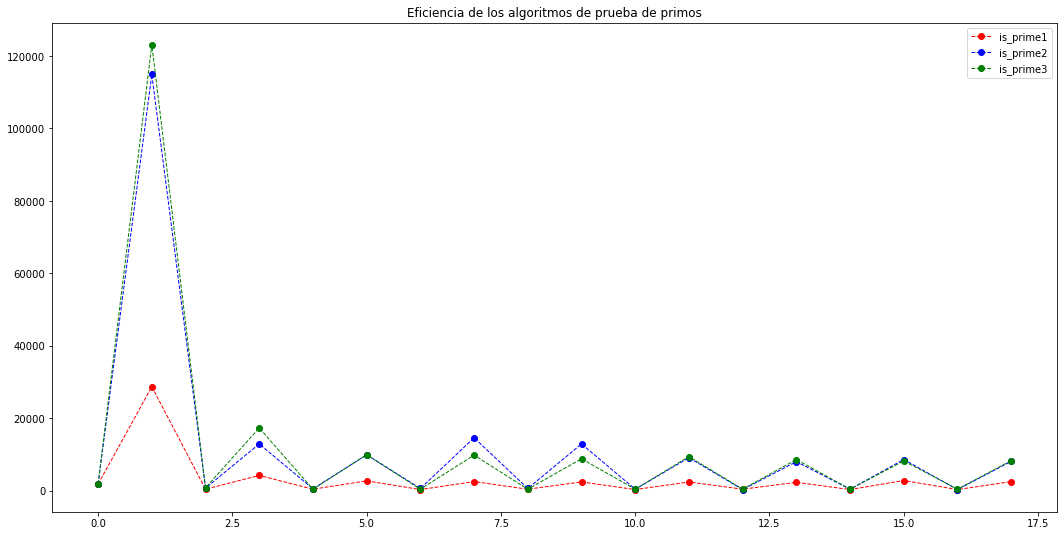

In [73]:
plt.figure(figsize=(18,9))
plt.title('Eficiencia de los algoritmos de prueba de primos')
plt.plot(t1, 'ro--', color = 'red', linewidth=1, label = 'is_prime1')
plt.plot(t2, 'ro--', color = 'blue', linewidth=1, label = 'is_prime2')
plt.plot(t3, 'ro--', color = 'green', linewidth=1, label = 'is_prime3')
plt.legend()
plt.show()

## Buscar Primos

In [74]:
def find_primes(ns: int, nf:int) -> list:
    
    primes = []
    
    for i in range(ns, nf + 1):
        if is_prime1(i):
            primes.append(i)
    
    return primes

In [75]:
def find_first_primes(n: int) -> list:
    if n <= 0:
        return []
    
    primes = [2]

    if n == 1:
        return primes
    
    count = 3
    while len(primes) < n:
        
        if is_prime1(count):
            primes.append(count)
        
        count += 2

    return primes

In [76]:
ns = 1
nf = 20

In [77]:
find_primes(ns, nf)

[2, 3, 5, 7, 11, 13, 17, 19]

In [78]:
n = 20

find_first_primes(n)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]

## Primos Gemelos

In [79]:
def twins_primes(ns: int, nf: int) -> list:
    twins_primes = []

    primes = np.array(find_primes(ns, nf))

    if len(primes) < 2:
        return []

    position = np.diff(primes)
    
    index = 0
    while index < len(position) - 1:
        tmp = []
        if position[index] == 2:
            tmp.append(primes[index])
            tmp.append(primes[index + 1])
            twins_primes.append(tmp)
        
        index += 1

    return twins_primes


In [80]:
def twins_first_primes(n: int) -> list:
    twins_primes = []

    primes = np.array(find_first_primes(n))

    if len(primes) < 2:
        return []

    position = np.diff(primes)
    
    index = 0
    while index < len(position) - 1:
        tmp = []
        if position[index] == 2:
            tmp.append(primes[index])
            tmp.append(primes[index + 1])
            twins_primes.append(tmp)
        
        index += 1

    return twins_primes

In [81]:
twins_primes(2, 100)

[[3, 5], [5, 7], [11, 13], [17, 19], [29, 31], [41, 43], [59, 61], [71, 73]]

In [82]:
twins_first_primes(10)

[[3, 5], [5, 7], [11, 13], [17, 19]]

## Numero de **Brun**

In [83]:
n_approx = 10000

primes = np.array(twins_first_primes(n_approx))

primes = 1/primes

In [84]:
sum(sum(primes))

1.673696879915452

## Serie de diferencias de inversos de primos gemelos

In [91]:
n_approx = 100000

primes = np.array(twins_first_primes(n_approx))

primes = 1 / primes

In [92]:
sum(-np.diff(primes))[0]

0.21596794076796888